In [1]:
#import libraries
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")
import copy

In [2]:
#load csv
pd1 = pd.read_csv('Our Bank customer data.csv')

In [3]:
pd1.head(50)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,NaN
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,NaN
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,NaN
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,NaN
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,NaN


In [4]:
#show the size of the dataframe
pd1.shape

(10127, 22)

In [5]:
#show all of the columns
pd1.columns.values

array(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21'], dtype=object)

In [6]:
#check for missing values
pd1.isna().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

In [7]:
#removing the empty column
pd1.drop('Unnamed: 21', inplace=True, axis=1)

In [8]:
pd1.columns.values

array(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype=object)

In [9]:
#finding any duplicates
duplicateRowsDF = pd1[pd1.duplicated()]
print(duplicateRowsDF)
#no duplicates found

Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]


In [10]:
pd1.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [11]:
#customer churn count
pd1['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

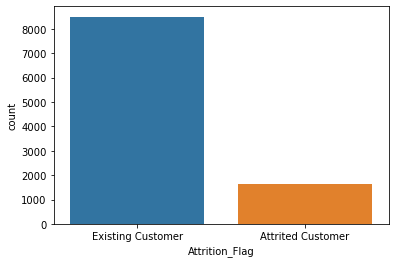

In [12]:
#visualize the churn count
sns.countplot(pd1['Attrition_Flag'])

In [13]:
#percentage of churned customer
num_existing = pd1[pd1.Attrition_Flag == "Existing Customer"].shape[0]
num_churned = pd1[pd1.Attrition_Flag == "Attrited Customer"].shape[0]
#print the percentage of customers that stayed
print(num_existing / (num_existing + num_churned) * 100, '% customers stayed with the company.')
##print the percentage of customers that left
print(num_churned / (num_existing + num_churned) * 100, '% customers left the company.')

83.934037720944 % customers stayed with the company.
16.065962279055988 % customers left the company.


<AxesSubplot:xlabel='Gender', ylabel='count'>

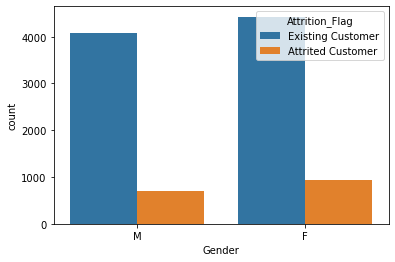

In [14]:
#comparing gender 
sns.countplot(x='Gender', hue='Attrition_Flag', data = pd1)

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

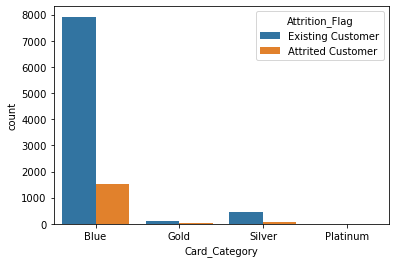

In [15]:
#visualize the churn count for the card type
sns.countplot(x='Card_Category', hue='Attrition_Flag', data = pd1)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

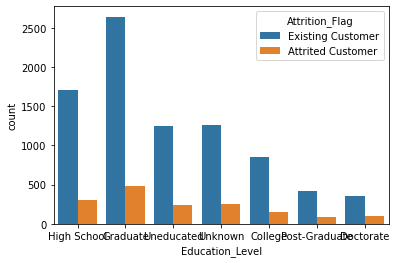

In [16]:
#comparing educational level
sns.countplot(x='Education_Level', hue='Attrition_Flag', data = pd1)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

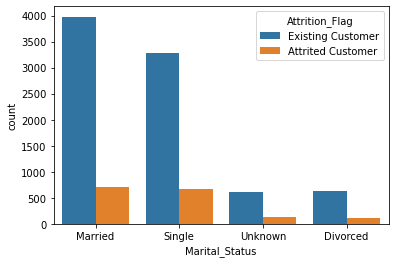

In [17]:
#comparing marital status
sns.countplot(x='Marital_Status', hue='Attrition_Flag', data = pd1)

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

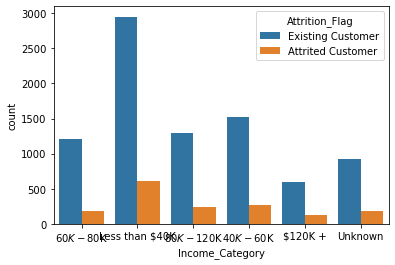

In [18]:
#comparing income
sns.countplot(x='Income_Category', hue='Attrition_Flag', data = pd1)

<AxesSubplot:xlabel='Months_on_book', ylabel='count'>

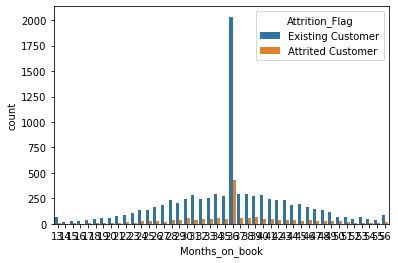

In [19]:
#comparing how long the relationship with bank
sns.countplot(x='Months_on_book', hue='Attrition_Flag', data = pd1)

array([[<AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>]],
      dtype=object)

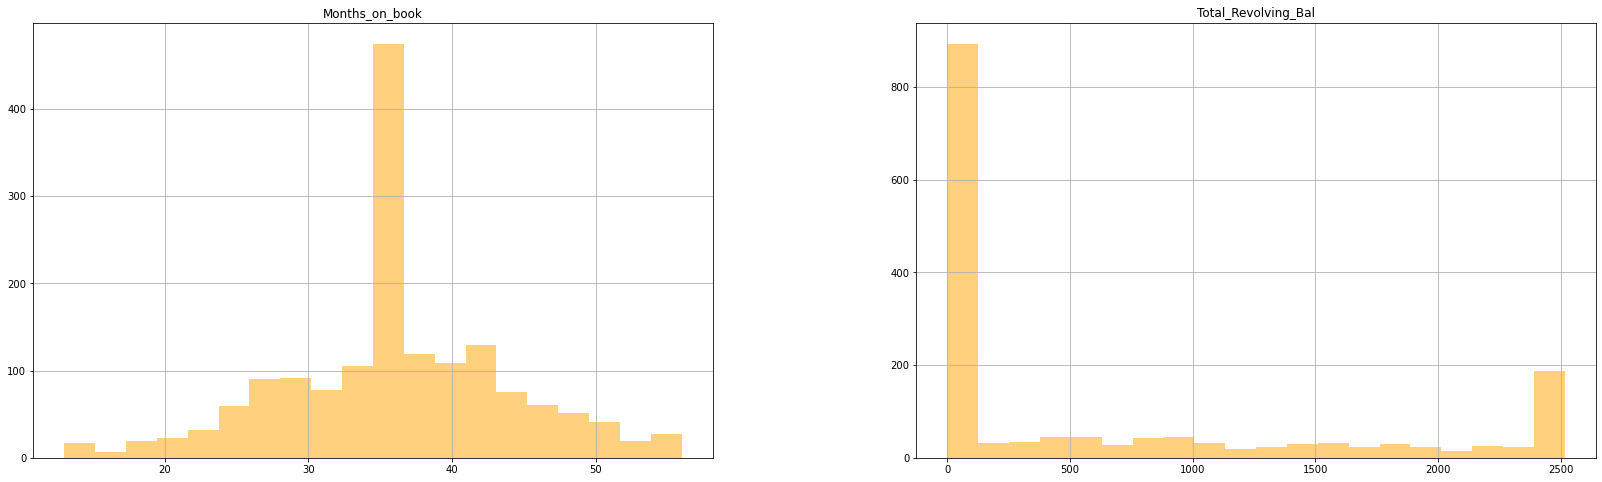

In [20]:
#looking for the frequency by months on books and total revolving balance for attrited customers
numerical_features = ['Months_on_book', 'Total_Revolving_Bal']
fig, ax = plt.subplots(figsize = (28,8))
pd1[pd1.Attrition_Flag == 'Attrited Customer'][numerical_features].hist(bins = 20, color='orange', alpha=0.5, ax = ax)

array([[<AxesSubplot:title={'center':'Months_on_book'}>,
        <AxesSubplot:title={'center':'Total_Revolving_Bal'}>]],
      dtype=object)

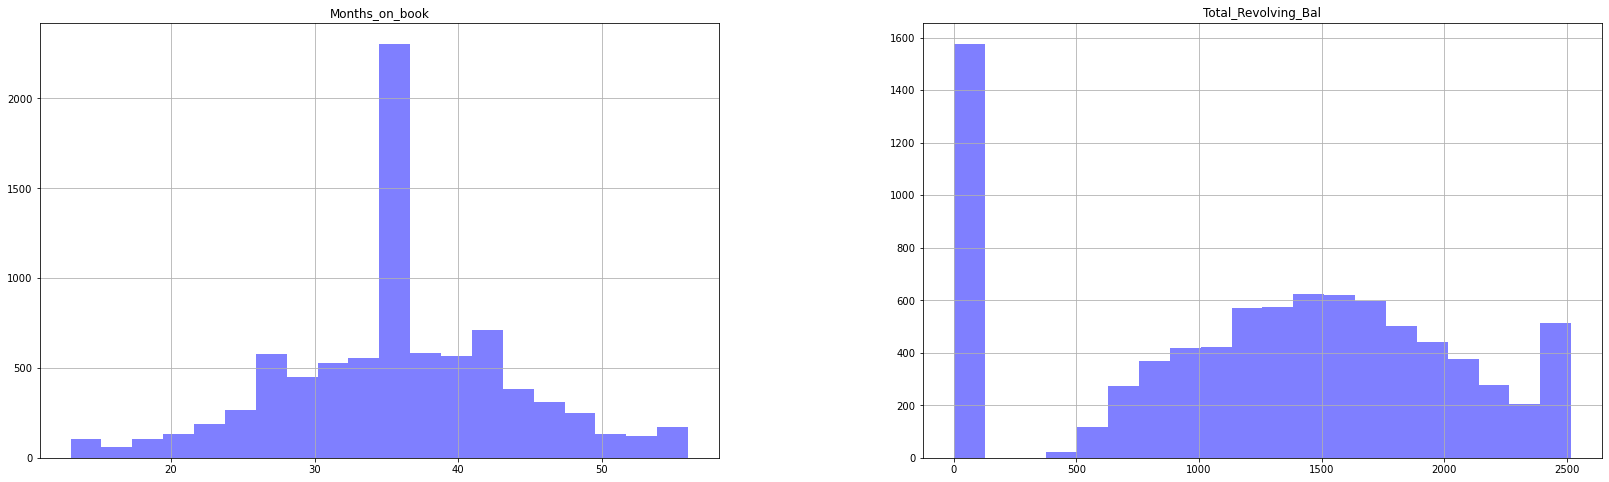

In [21]:
#looking for the frequency by months on books and total revolving balance for existing customers
fig, ax = plt.subplots(figsize = (28,8))
pd1[pd1.Attrition_Flag == 'Existing Customer'][numerical_features].hist(bins = 20, color='blue', alpha=0.5, ax = ax)

array([[<AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>]], dtype=object)

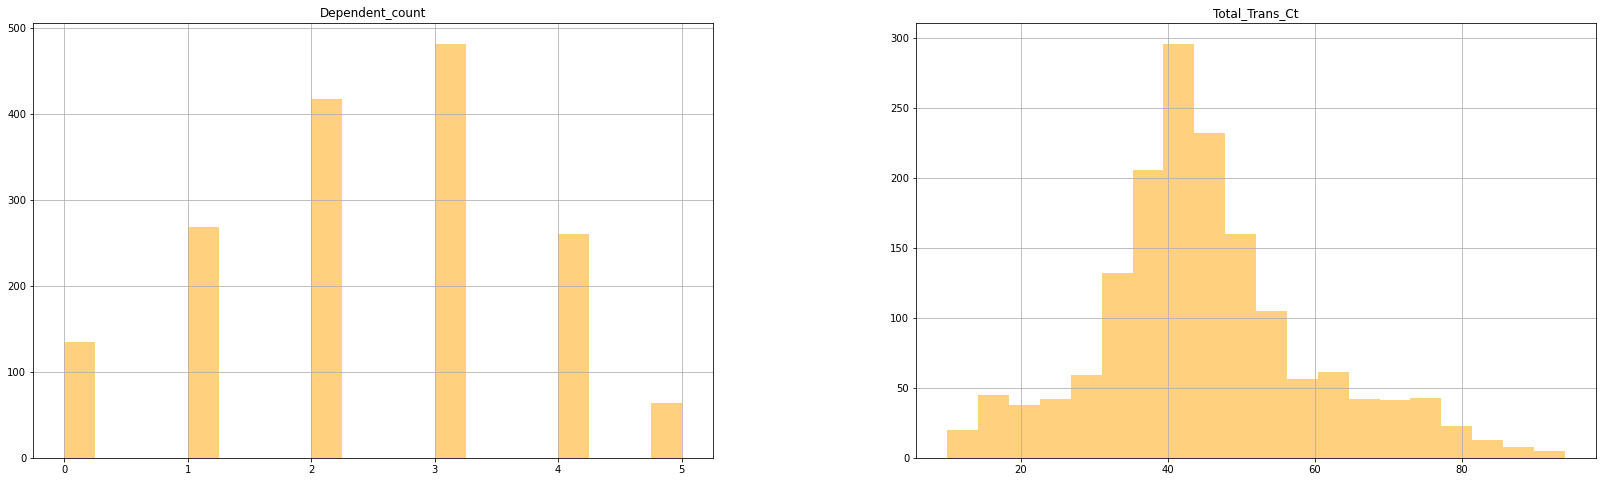

In [22]:
#looking for the frequency by Dependent_count and otal_Trans_Ct for attrited customers
numerical_featurez = ['Dependent_count', 'Total_Trans_Ct']
fig, ax = plt.subplots(figsize = (28,8))
pd1[pd1.Attrition_Flag == 'Attrited Customer'][numerical_featurez].hist(bins = 20, color='orange', alpha=0.5, ax = ax)

array([[<AxesSubplot:title={'center':'Dependent_count'}>,
        <AxesSubplot:title={'center':'Total_Trans_Ct'}>]], dtype=object)

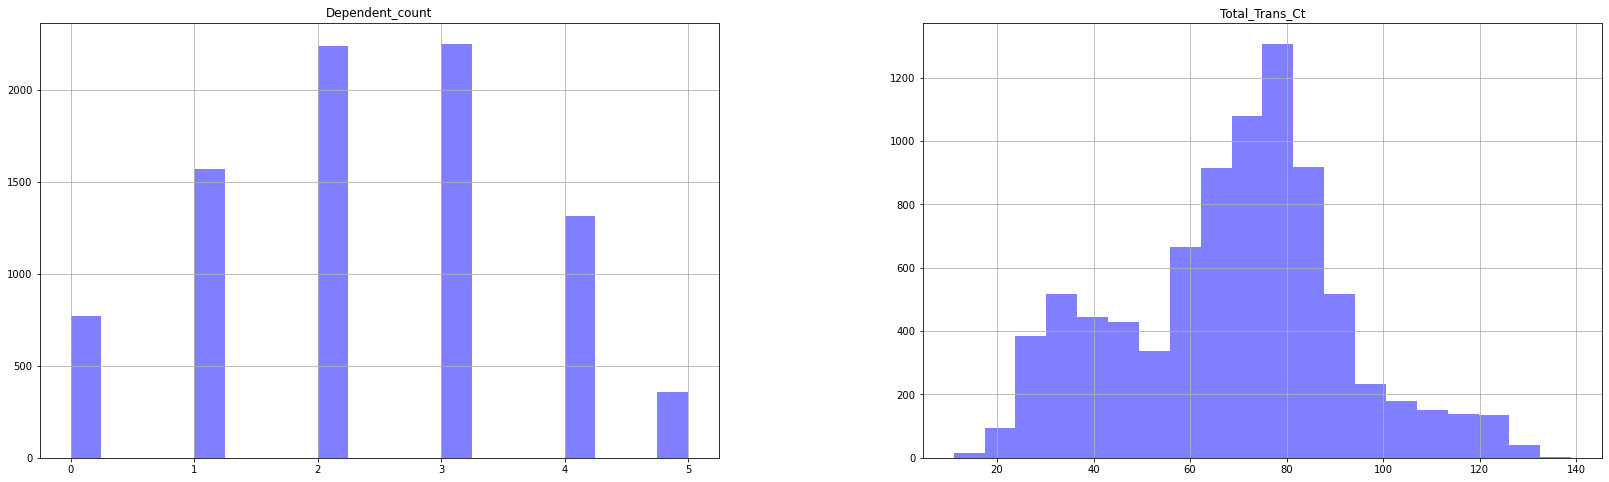

In [23]:
#looking for the frequency by Dependent_count and otal_Trans_Ct for existing customers
fig, ax = plt.subplots(figsize = (28,8))
pd1[pd1.Attrition_Flag == 'Existing Customer'][numerical_featurez].hist(bins = 20, color='blue', alpha=0.5, ax = ax)

<AxesSubplot:xlabel='Months_on_book', ylabel='Avg_Utilization_Ratio'>

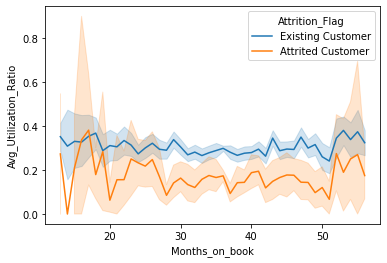

In [24]:
# growth over time(Months_on_book) of average utilization ratio
sns.lineplot(data=pd1, x="Months_on_book", y="Avg_Utilization_Ratio", hue='Attrition_Flag')

<AxesSubplot:xlabel='Months_on_book', ylabel='Total_Ct_Chng_Q4_Q1'>

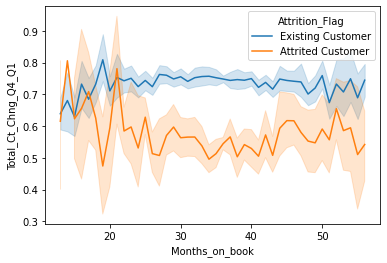

In [25]:
# growth over time(Months_on_book) of Total_Ct_Chng_Q4_Q1
sns.lineplot(data=pd1, x="Months_on_book", y="Total_Ct_Chng_Q4_Q1", hue='Attrition_Flag')

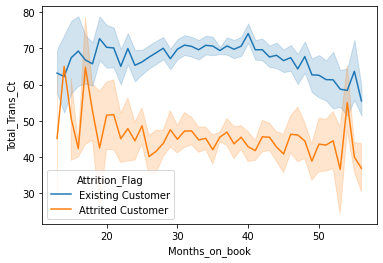

In [26]:
# growth over time(Months_on_book) of Total_Trans_Ct
graph1 = sns.lineplot(data=pd1, x="Months_on_book", y="Total_Trans_Ct", hue='Attrition_Flag')
 
plt.show()

<AxesSubplot:xlabel='Months_on_book', ylabel='Credit_Limit'>

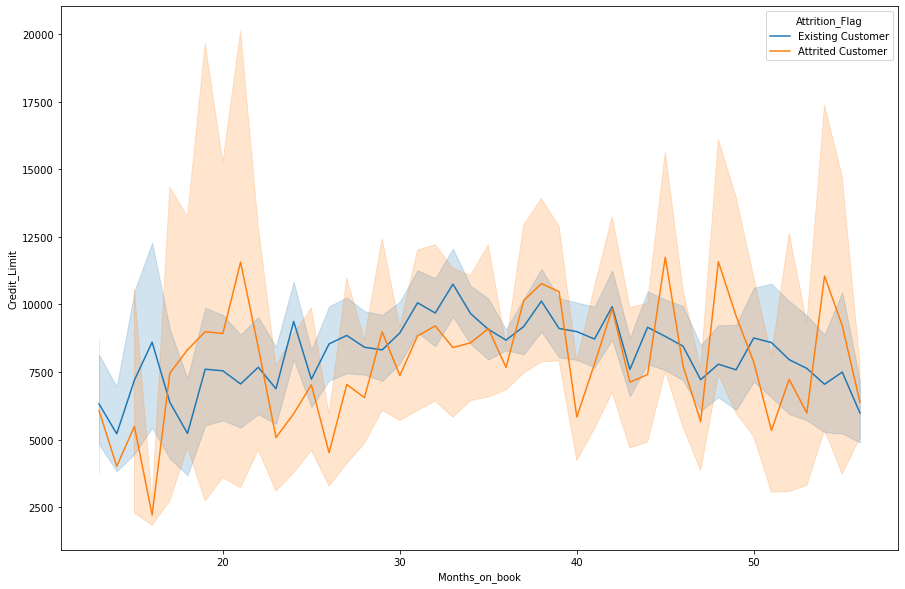

In [27]:
# growth over time(Months_on_book) of Credit_Limit
plt.figure(figsize = (15,10))
sns.lineplot(data=pd1, x="Months_on_book", y="Credit_Limit", hue = 'Attrition_Flag')